# Task_1: Student hardwork and performance in exams

In this task, problem statement is to determine the students performance in exams based on hours of study they put in before examinations. As this is a single feature problem, problem is approched with a linear modeling to find to linear dependency of feature over the scores of students. 


## 1. Importing libreries

In [1]:
# importing required libreries 

import warnings 
warnings.filterwarnings('ignore')

#data manipulation libreries
import pandas as pd
import numpy as np
 
#data visualization libreries
import matplotlib.pyplot as plt
import seaborn as sns

#required dependencies
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score

#linear model
from sklearn.linear_model import LinearRegression

## 2. Data visulaization

In [2]:
# data downloading
url = 'http://bit.ly/w-data'
print('Downloading dataset.....')

df = pd.read_csv(url)

print('Downloading completed')

In [3]:
# daraset information and feature data types
info = df.info()
print(info)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes
None


In [4]:
# looking for total null values and statistics in dataset

print('Total null value percentages in the dataset')
for col in df.columns:
    print(col+':', str(round(100 * df[col].isnull().sum() / len(df[col]),2)) + '%')
print('total columns in dataset {}'.format(len(df.columns)))

print(' '*100)
print('*'*50 )
print(' '*100)
print('Description to the data')
print(df.describe().T)


Total null value percentages in the dataset
Hours: 0.0%
Scores: 0.0%
total columns in dataset 2
                                                                                                    
**************************************************
                                                                                                    
Description to the data
        count    mean        std   min   25%   50%   75%   max
Hours    25.0   5.012   2.525094   1.1   2.7   4.8   7.4   9.2
Scores   25.0  51.480  25.286887  17.0  30.0  47.0  75.0  95.0


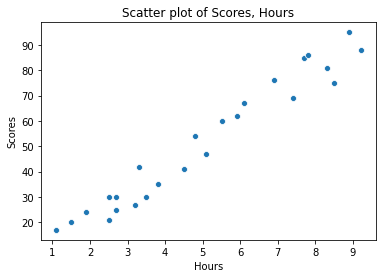

In [5]:
# data visulaiazation

ax = sns.scatterplot(x =  'Hours', y = 'Scores', data = df)
ax = ax.set_title('Scatter plot of Scores, Hours')

This scatter plot shows that studets perfomance is almost propotional to the hours of student put in  prepration for exam.

# Train and test data spliting

In [17]:
# data and labels
data = pd.DataFrame(df['Hours'])
labels = pd.DataFrame(df['Scores'])

#train and test data spliting
X_train,X_test, y_train,y_test = train_test_split(data, labels, test_size = 0.2)

print('Shape of X_train:{}'.format(X_train.shape))
print('Shape of y_train:{}'.format(y_train.shape))
print('Shape of X_test:{}'.format(X_test.shape))
print('Shape of y_test:{}'.format(y_test.shape))

Shape of X_train:(20, 1)
Shape of y_train:(20, 1)
Shape of X_test:(5, 1)
Shape of y_test:(5, 1)


# Model Training and prediction

In [22]:
from sklearn.linear_model import LinearRegression

try:
    clf = LinearRegression().fit(X_train, y_train)
    y_preds = clf.predict(X_test)
    coef = [clf.coef_, clf.intercept_]
    print('Training is completed')
    print('Coefficnet of linear regression:{}'.format(coef[0]))
    print('Intercept of linear regression:{}'.format(coef[1]))
except:
    print('Errror occured in training')

Training is completed
Coefficnet of linear regression:[[9.95630803]]
Intercept of linear regression:[0.91889678]


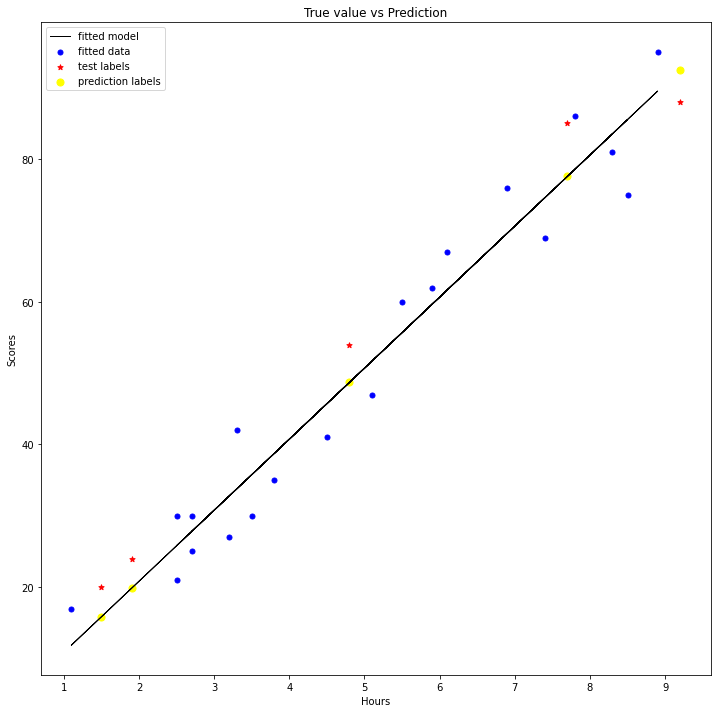

In [23]:
#visulaization of results

plt.figure(figsize = (12,12))
y_line = coef[0]*X_train + coef[1]

plt.scatter(X_train,y_train, color = 'blue', s = 25)
plt.scatter(X_test,y_test, color = 'red', marker = '*', s= 30)
plt.scatter(X_test, y_preds, color = 'yellow', marker = 'o',s = 50)
plt.plot(X_train,y_line, color = 'black', linewidth = '1')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.title('True value vs Prediction')
plt.legend(['fitted model', 'fitted data', 'test labels', 'prediction labels'])
plt.show()

In [24]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
print('Root mean squared error: {}'.format(round((math.sqrt(mean_squared_error(y_test, y_preds))),2)))
print('Mean absolute error: {}'.format(round((mean_absolute_error(y_test, y_preds)), 2)))

Root mean squared error: 5.25
Mean absolute error: 5.11


# Predictions

In [45]:
pred_df = y_test.copy()
pred_df['Predictions'] = y_preds
pred_df.rename(columns = {'Scores': 'Actual'}, inplace = True)
pred_df.reset_index(drop = True, inplace =True)

In [55]:
pred_df

,Actual,Predictions
0,85,77.582469
1,54,48.709175
2,20,15.853359
3,88,92.516931
4,24,19.835882


In [58]:
# test of model of specific hours of prepration
hr = np.array([9.25])
pred = clf.predict(hr.reshape(1,-1))
print("No of Hours = {}".format(hr))
print("Predicted Score = {}".format(pred[0]))

No of Hours = [9.25]
Predicted Score = [93.01474604]
